In [1]:
import pandas as pd

pd.set_option("display.max_columns", 200)

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

from sklearn import set_config

set_config(transform_output="pandas")

from category_encoders import HashingEncoder


freq_imputer = SimpleImputer(strategy="most_frequent")
zero_imputer = SimpleImputer(strategy="constant", fill_value=0)
scaler = StandardScaler()
ohe = OneHotEncoder(
    handle_unknown="infrequent_if_exist", sparse_output=False, drop="if_binary"
)

hash = HashingEncoder(n_components=10, return_df=True, drop_invariant=True)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay


import sys
sys.path.insert(0, "../src")
from eval_classification import eval_classification
del sys.path[0]

In [2]:
df = pd.read_parquet("../data/processed/merged_data.parquet")
df

,track_id,genre,title,artist_name,duration,year_x,&,000,1,10,100,12,13,15,16,2,20,24,2x,3,30,3x,4,40,4x,5,50,6,7,8,9,a,aaah,aah,aan,ab,abandon,aber,abl,aboard,about,abov,abr,absenc,absolut,absurd,abus,abyss,acaba,acabar,accept,accid,accus,ace,ach,achiev,acid,across,act,action,actor,actual,ad,adam,add,addict,adentro,adesso,adio,adió,admir,admit,ador,advanc,adventur,advic,afar,affair,affect,afford,afraid,africa,after,afternoon,again,against,age,ago,agoni,agora,agre,agua,ah,aha,ahead,ahh,ahhh,ahi,ahora,ahí,...,wood,wooden,word,wore,work,workin,world,worm,worn,worri,wors,worship,worst,wort,worth,worthi,worthless,would,wound,wow,wrap,wrath,wreck,wretch,wrist,write,writer,written,wrong,wrote,wär,x,x2,x3,x4,y,ya,yah,yall,yang,yard,ye,yea,yeah,year_y,yearn,yeh,yell,yellow,yer,yes,yesterday,yet,yeux,yi,yo,yonder,york,you,young,younger,your,yourself,youth,you´r,youâr,you’r,yuh,z,za,ze,zeit,zero,zijn,zo,zombi,zone,zoo,zu,zum,zur,zurück,zwei,,¿qué,à,â,är,å,ça,è,é,él,és,était,être,ô,über,–,‘caus
0,TRAAAAV128F421A322,Pop_Rock,A Poor Recipe For Civic Cohesion,Western Addiction,118.07302,2005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,TRAAABD128F429CF47,Pop_Rock,Soul Deep,The Box Tops,148.03546,1969,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,TRAAAED128E0783FAB,Vocal,It's About Time,Jamie Cullum,246.98730,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,TRAAAEF128F4273421,Pop_Rock,Something Girls,Adam Ant,233.40363,1982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,TRAAAFD128F92F423A,Pop_Rock,Face the Ashes,Gob,209.60608,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [3]:
df["year_x"] = df["year_x"]/1000
df["duration"] = df["duration"]/60
df

,track_id,genre,title,artist_name,duration,year_x,&,000,1,10,100,12,13,15,16,2,20,24,2x,3,30,3x,4,40,4x,5,50,6,7,8,9,a,aaah,aah,aan,ab,abandon,aber,abl,aboard,about,abov,abr,absenc,absolut,absurd,abus,abyss,acaba,acabar,accept,accid,accus,ace,ach,achiev,acid,across,act,action,actor,actual,ad,adam,add,addict,adentro,adesso,adio,adió,admir,admit,ador,advanc,adventur,advic,afar,affair,affect,afford,afraid,africa,after,afternoon,again,against,age,ago,agoni,agora,agre,agua,ah,aha,ahead,ahh,ahhh,ahi,ahora,ahí,...,wood,wooden,word,wore,work,workin,world,worm,worn,worri,wors,worship,worst,wort,worth,worthi,worthless,would,wound,wow,wrap,wrath,wreck,wretch,wrist,write,writer,written,wrong,wrote,wär,x,x2,x3,x4,y,ya,yah,yall,yang,yard,ye,yea,yeah,year_y,yearn,yeh,yell,yellow,yer,yes,yesterday,yet,yeux,yi,yo,yonder,york,you,young,younger,your,yourself,youth,you´r,youâr,you’r,yuh,z,za,ze,zeit,zero,zijn,zo,zombi,zone,zoo,zu,zum,zur,zurück,zwei,,¿qué,à,â,är,å,ça,è,é,él,és,était,être,ô,über,–,‘caus
0,TRAAAAV128F421A322,Pop_Rock,A Poor Recipe For Civic Cohesion,Western Addiction,1.967884,2.005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,TRAAABD128F429CF47,Pop_Rock,Soul Deep,The Box Tops,2.467258,1.969,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,TRAAAED128E0783FAB,Vocal,It's About Time,Jamie Cullum,4.116455,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,TRAAAEF128F4273421,Pop_Rock,Something Girls,Adam Ant,3.890060,1.982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,TRAAAFD128F92F423A,Pop_Rock,Face the Ashes,Gob,3.493435,2.007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127402 entries, 0 to 127401
Columns: 5006 entries, track_id to ‘caus
dtypes: float64(2), int64(5000), object(4)
memory usage: 4.8+ GB


In [5]:
df.duplicated(subset="track_id").sum()

np.int64(0)

In [6]:
df.isna().sum().sum()

np.int64(0)

In [7]:
lookup = df[["track_id", "genre", "title", "artist_name"]]
lookup

,track_id,genre,title,artist_name
0,TRAAAAV128F421A322,Pop_Rock,A Poor Recipe For Civic Cohesion,Western Addiction
1,TRAAABD128F429CF47,Pop_Rock,Soul Deep,The Box Tops
2,TRAAAED128E0783FAB,Vocal,It's About Time,Jamie Cullum
3,TRAAAEF128F4273421,Pop_Rock,Something Girls,Adam Ant
4,TRAAAFD128F92F423A,Pop_Rock,Face the Ashes,Gob
...,...,...,...,...
127397,TRZZZQO128E078864C,Pop_Rock,Weight Of The World (LP Version),Overkill
127398,TRZZZWS128F429CF87,Latin,Que No Destrocen Tu Vida,Los Prisioneros
127399,TRZZZXA128F428ED56,Pop_Rock,No Angels,The God Awfuls
127400,TRZZZYV128F92E996D,RnB,Dear Lie,TLC


In [8]:
from scipy.sparse import csr_matrix

X = df.drop(columns=["track_id", "genre", "title", "artist_name"]).copy()
sp_X = pd.DataFrame.sparse.from_spmatrix(csr_matrix(X))

y = df["genre"].copy()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    sp_X, y, test_size=0.2, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42, stratify=y_test
)

In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, class_weight="balanced", solver="saga", n_jobs=-1).fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/lyrics_env/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


                    Train Evaluation                                       Test Evaluation                   
               precision    recall  f1-score   support                precision    recall  f1-score   support
                                                                                                             
                                                                                                             
        Blues       0.09      0.74      0.15       509         Blues       0.06      0.53      0.11        64
                                                                                                             
      Country       0.25      0.46      0.32      4051       Country       0.22      0.40      0.28       506
                                                                                                             
   Electronic       0.07      0.34      0.12      2899    Electronic       0.06      0.27      0.10       362
          

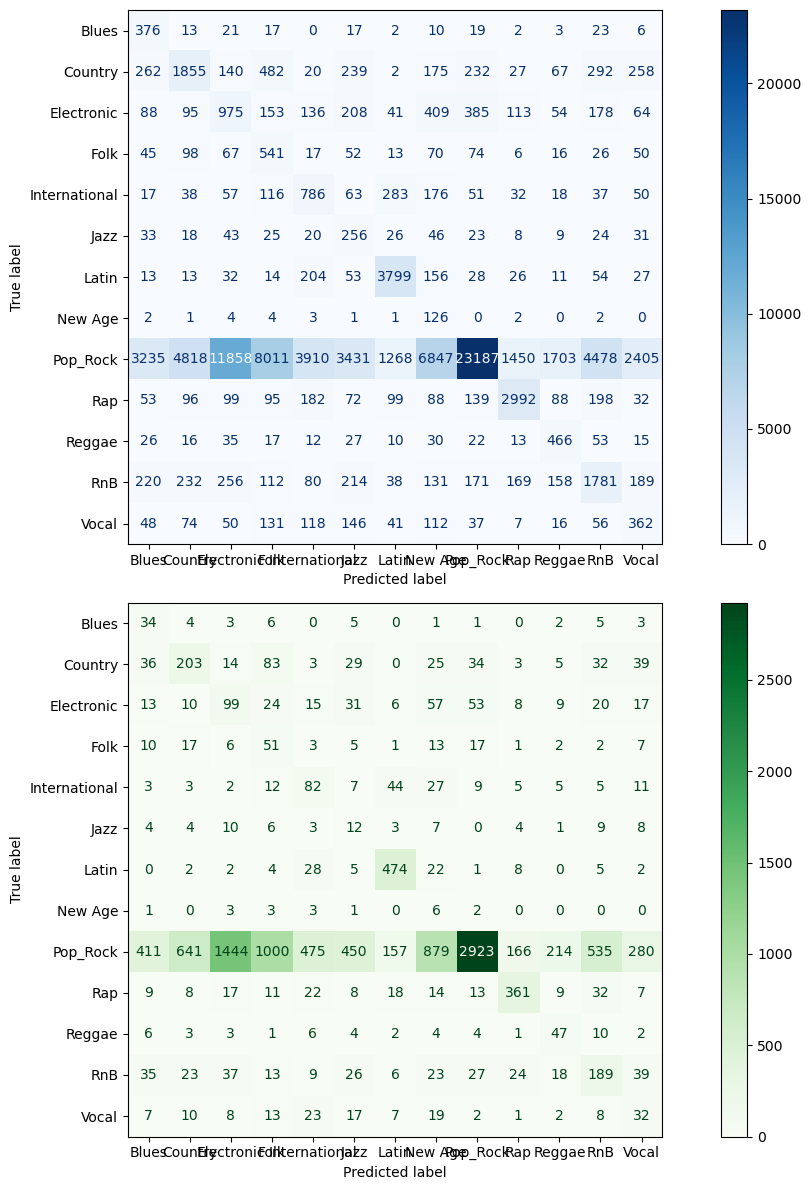

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1
Logistic Regression,0.367952,0.354239,0.797565,0.789695,0.367952,0.354239,0.443566,0.438573


In [11]:
clf_results = eval_classification(clf, X_train, y_train, X_val, y_val, model_name="Logistic Regression", average="weighted")
clf_results

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced_subsample").fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/lyrics_env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/lyrics_env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/lyrics_env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

                    Train Evaluation                                       Test Evaluation                   
               precision    recall  f1-score   support                precision    recall  f1-score   support
                                                                                                             
                                                                                                             
        Blues       1.00      1.00      1.00       509         Blues       0.00      0.00      0.00        64
                                                                                                             
      Country       1.00      1.00      1.00      4051       Country       0.58      0.02      0.04       506
                                                                                                             
   Electronic       1.00      1.00      1.00      2899    Electronic       0.69      0.03      0.06       362
          

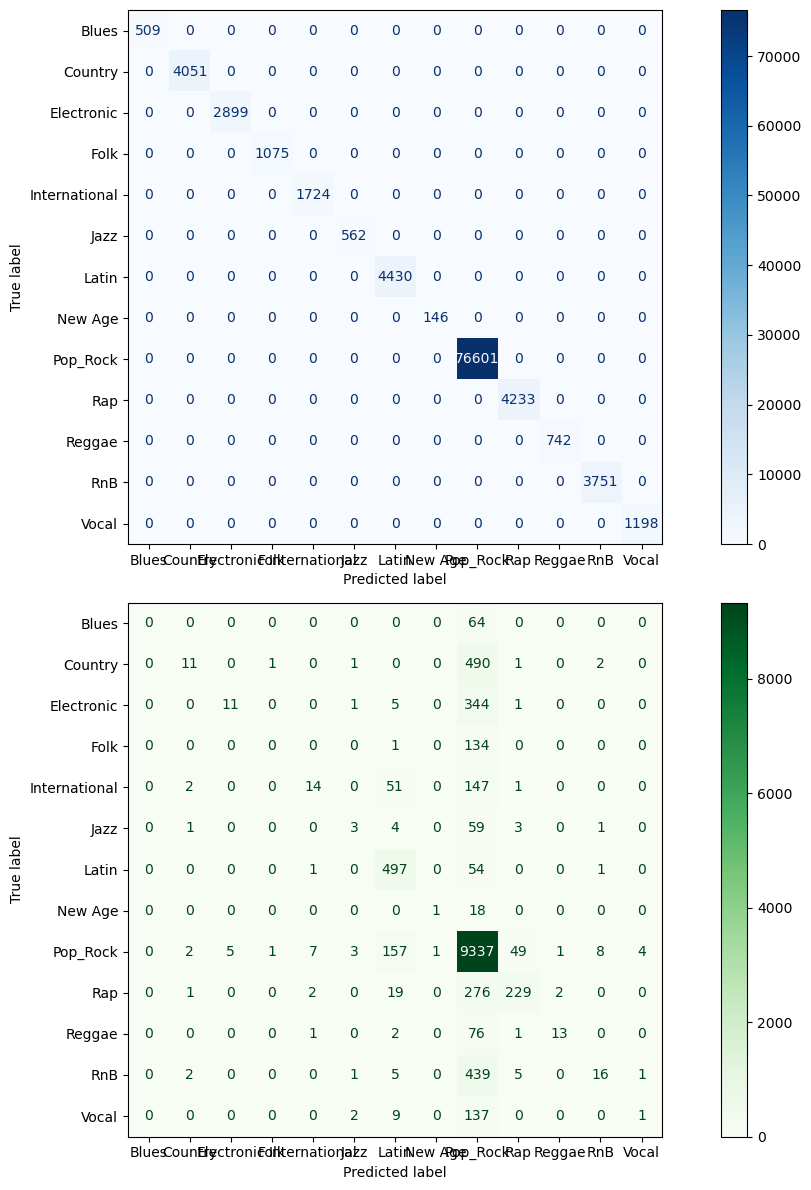

/opt/homebrew/Caskroom/miniforge/base/envs/lyrics_env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1
Logistic Regression,0.367952,0.354239,0.797565,0.789695,0.367952,0.354239,0.443566,0.438573
Random Forest,1.000000,0.795369,1.000000,0.750970,1.000000,0.795369,1.000000,0.730017


In [13]:
rf_results = eval_classification(rf, X_train, y_train, X_val, y_val, model_name="Random Forest", average="weighted", results_frame=clf_results)
rf_results

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, class_weight="balanced").fit(X_train, y_train)

                    Train Evaluation                                       Test Evaluation                   
               precision    recall  f1-score   support                precision    recall  f1-score   support
                                                                                                             
                                                                                                             
        Blues       1.00      1.00      1.00       509         Blues       0.13      0.17      0.15        64
                                                                                                             
      Country       1.00      1.00      1.00      4051       Country       0.11      0.14      0.12       506
                                                                                                             
   Electronic       1.00      1.00      1.00      2899    Electronic       0.07      0.10      0.08       362
          

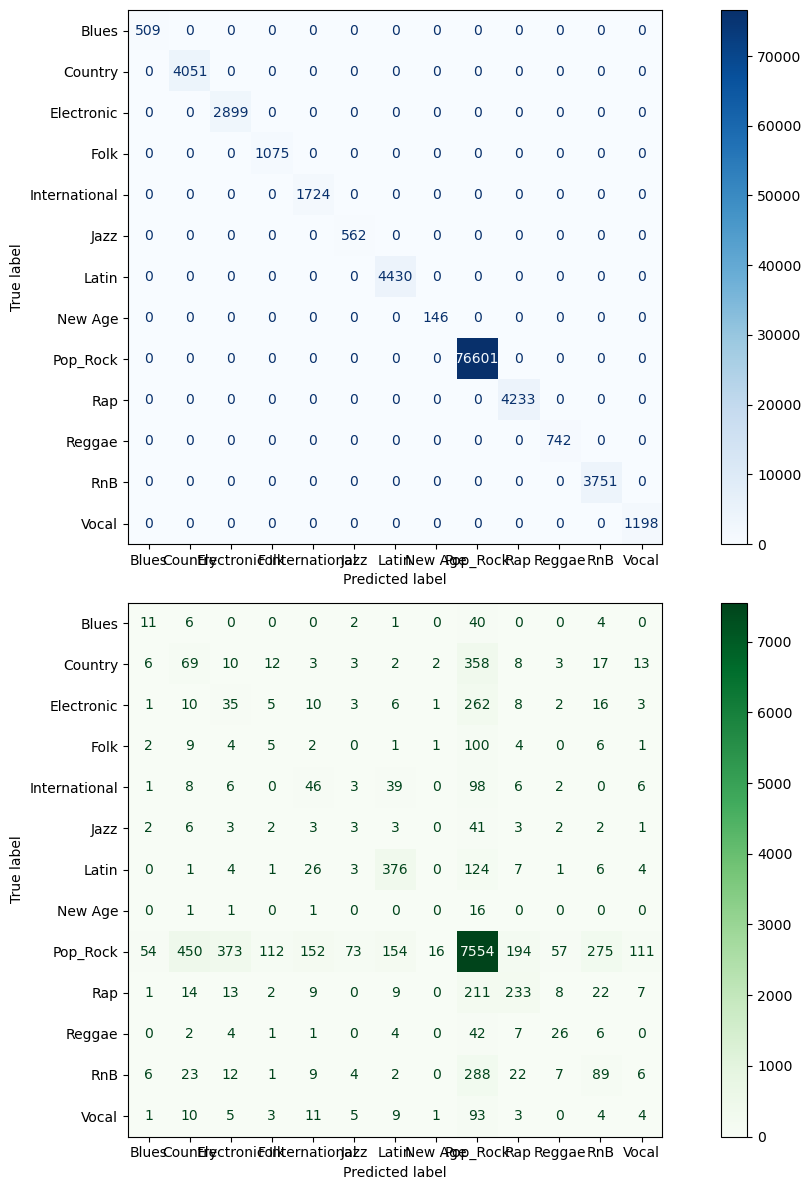

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1
Logistic Regression,0.367952,0.354239,0.797565,0.789695,0.367952,0.354239,0.443566,0.438573
Random Forest,1.000000,0.795369,1.000000,0.750970,1.000000,0.795369,1.000000,0.730017
Decision Tree,1.000000,0.663344,1.000000,0.681809,1.000000,0.663344,1.000000,0.672125


In [15]:
dt_results = eval_classification(dt, X_train, y_train, X_val, y_val, model_name="Decision Tree", average="weighted", results_frame=rf_results)
dt_results

In [18]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42, class_weight="balanced").fit(X_train.sparse.to_dense(), y_train)

                    Train Evaluation                                       Test Evaluation                   
               precision    recall  f1-score   support                precision    recall  f1-score   support
                                                                                                             
                                                                                                             
        Blues       0.19      0.94      0.32       509         Blues       0.10      0.50      0.17        64
                                                                                                             
      Country       0.29      0.75      0.42      4051       Country       0.21      0.56      0.30       506
                                                                                                             
   Electronic       0.16      0.64      0.25      2899    Electronic       0.09      0.39      0.15       362
          

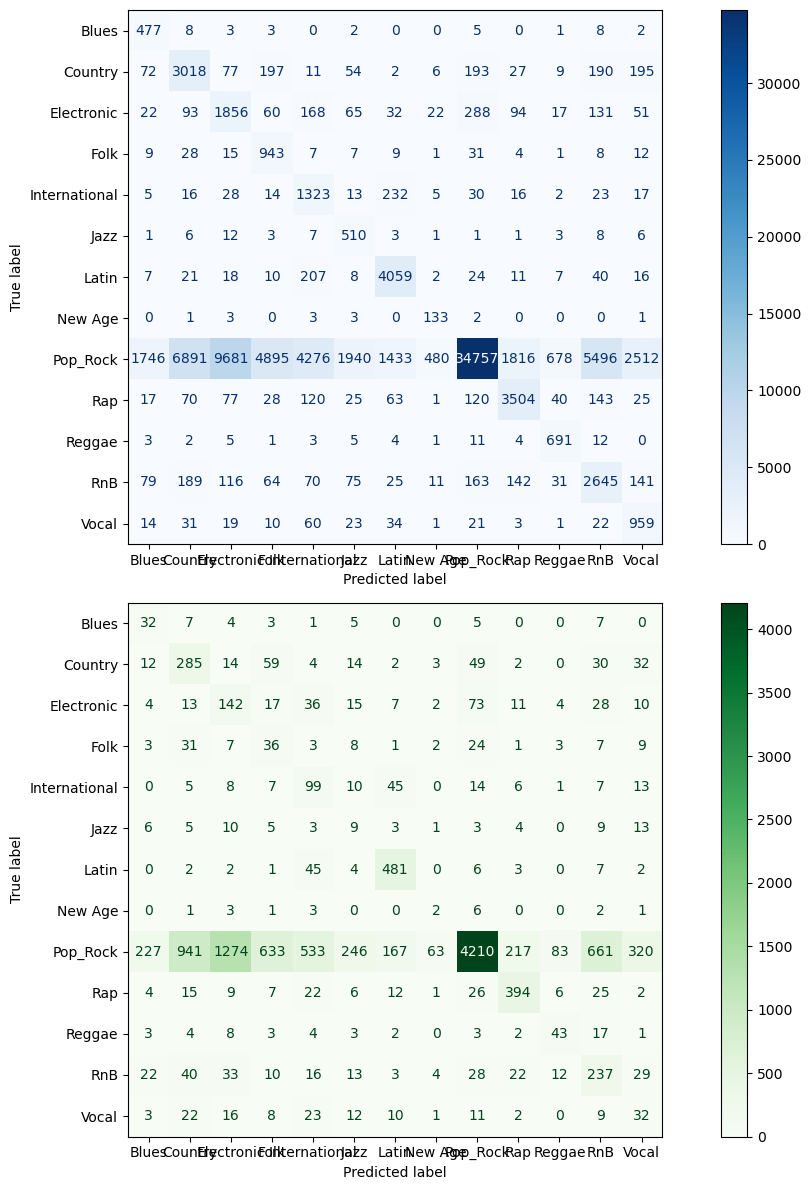

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1
Logistic Regression,0.367952,0.354239,0.797565,0.789695,0.367952,0.354239,0.443566,0.438573
Random Forest,1.000000,0.795369,1.000000,0.750970,1.000000,0.795369,1.000000,0.730017
Decision Tree,1.000000,0.663344,1.000000,0.681809,1.000000,0.663344,1.000000,0.672125
HG Boosting Classification Tree,0.538407,0.471115,0.829511,0.788272,0.538407,0.471115,0.589552,0.547769


In [20]:
hgb_results = eval_classification(hgb, X_train.sparse.to_dense(), y_train, X_val.sparse.to_dense(), y_val, model_name="HG Boosting Classification Tree", average="weighted", results_frame=dt_results)
hgb_results

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
b_train = le.fit_transform(y_train)
b_val = le.fit_transform(y_val)
b_test = le.fit_transform(y_test)

In [22]:
from xgboost import XGBClassifier
from scipy.special import softmax

def softprob_obj(labels: np.ndarray, predt: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    rows = labels.shape[0]
    classes = predt.shape[1]
    grad = np.zeros((rows, classes), dtype=float)
    hess = np.zeros((rows, classes), dtype=float)
    eps = 1e-6
    for r in range(predt.shape[0]):
        target = labels[r]
        p = softmax(predt[r, :])
        for c in range(predt.shape[1]):
            g = p[c] - 1.0 if c == target else p[c]
            h = max((2.0 * p[c] * (1.0 - p[c])).item(), eps)
            grad[r, c] = g
            hess[r, c] = h

    grad = grad.reshape((rows * classes, 1))
    hess = hess.reshape((rows * classes, 1))
    return grad, hess

xgb = XGBClassifier(random_state=42, n_jobs=-1, tree_method="hist", objective=softprob_obj).fit(X_train, b_train)

/opt/homebrew/Caskroom/miniforge/base/envs/lyrics_env/lib/python3.13/site-packages/xgboost/data.py:399: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")
/opt/homebrew/Caskroom/miniforge/base/envs/lyrics_env/lib/python3.13/site-packages/xgboost/core.py:2291: FutureWarning: Since 2.1.0, the shape of the gradient and hessian is required to be (n_samples, n_targets) or (n_samples, n_classes).
  warnings.warn(


/opt/homebrew/Caskroom/miniforge/base/envs/lyrics_env/lib/python3.13/site-packages/xgboost/data.py:399: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")
/opt/homebrew/Caskroom/miniforge/base/envs/lyrics_env/lib/python3.13/site-packages/xgboost/data.py:399: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")


                    Train Evaluation                                       Test Evaluation                   
              precision    recall  f1-score   support                precision    recall  f1-score   support 
                                                                                                             
           0       0.99      0.70      0.82       509             0       0.33      0.05      0.08        64 
           1       0.95      0.41      0.58      4051             1       0.62      0.16      0.26       506 
           2       0.99      0.11      0.19      2899             2       0.67      0.01      0.02       362 
           3       1.00      0.26      0.42      1075             3       0.00      0.00      0.00       135 
           4       0.96      0.26      0.41      1724             4       0.64      0.10      0.17       215 
           5       0.99      0.38      0.55       562             5       0.20      0.01      0.03        71 
          

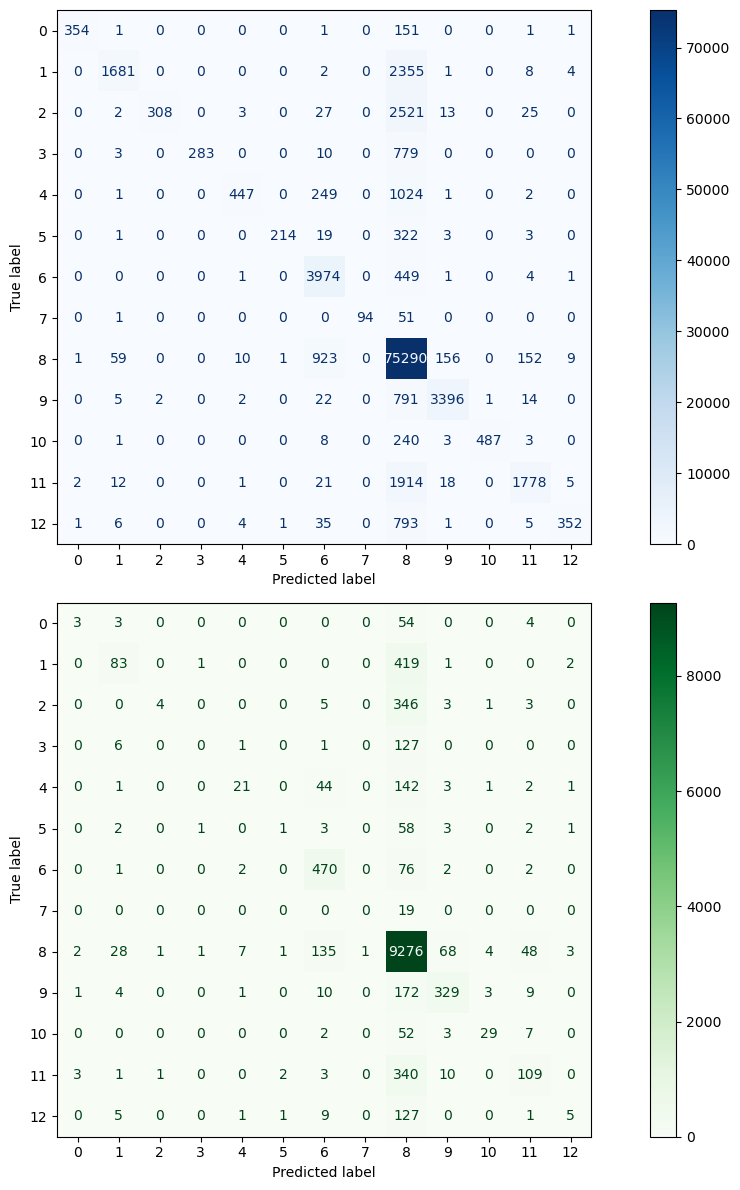

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1
Logistic Regression,0.367952,0.354239,0.797565,0.789695,0.367952,0.354239,0.443566,0.438573
Random Forest,1.000000,0.795369,1.000000,0.750970,1.000000,0.795369,1.000000,0.730017
Decision Tree,1.000000,0.663344,1.000000,0.681809,1.000000,0.663344,1.000000,0.672125
HG Boosting Classification Tree,0.538407,0.471115,0.829511,0.788272,0.538407,0.471115,0.589552,0.547769
XGBoost,0.869870,0.810832,0.880383,0.773277,0.869870,0.810832,0.846437,0.763188


In [23]:
xgb_results = eval_classification(xgb, X_train, b_train, X_val, b_val, model_name="XGBoost", average="weighted", results_frame=hgb_results)
xgb_results